In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from scipy.stats import entropy
import numpy as np

#fetch csv
file_path = '/Users/asger/Documents/GitHub/Deep_Learning_Techniques/Master/Data/final_dataset.csv'
df = pd.read_csv(file_path)

In [2]:
#daily price change
df['usd_eur_daily_change'] = df['usd_eur_exchange']

#remove first NA value bc of diff
df = df.dropna(subset=['usd_eur_daily_change'])

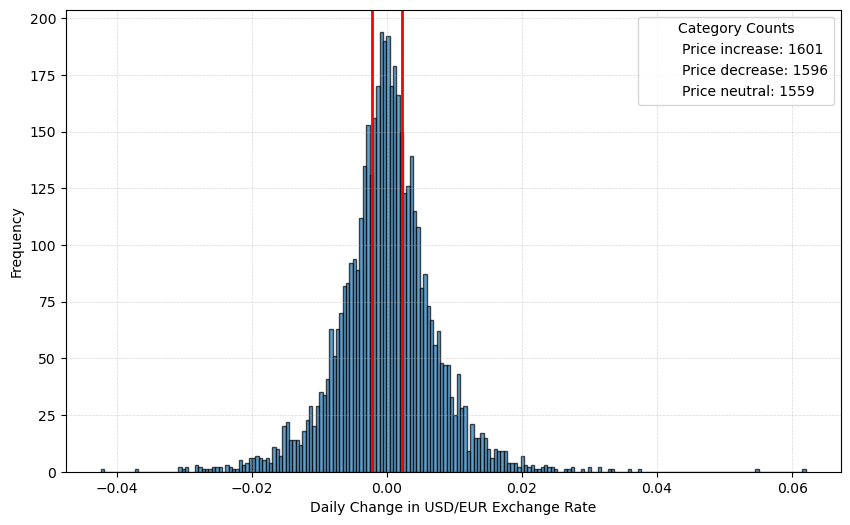

In [21]:
#remove first NA value bc of diff
df = df.dropna(subset=['usd_eur_daily_change'])

#defining quantiles (adjust this to desired)
q25 = df['usd_eur_daily_change'].quantile(0.341)
q75 = df['usd_eur_daily_change'].quantile(0.66)
#categorize function creation
def categorize_change(change, q25, q75):
    if change < q25:
        return 'Decrease'
    elif change > q75:
        return 'Increase'
    else:
        return 'Neutral'

# make new column with category and apply function
df['category'] = df['usd_eur_daily_change'].apply(categorize_change, args=(q25, q75))

#fetch count for each cat - used for legends later
counts = df['category'].value_counts()
increases = counts.get('Increase', 0)
decreases = counts.get('Decrease', 0)
neutrals = counts.get('Neutral', 0)

#plotting hist.
plt.figure(figsize=(10, 6))
plt.hist(df['usd_eur_daily_change'], bins=210, edgecolor='k', alpha=0.7)

#add threshold lines (qtiles)
plt.axvline(q25, color='r', linestyle='-', linewidth=2, label=f'25th Percentile: {q25:.3f}')
plt.axvline(q75, color='r', linestyle='-', linewidth=2, label=f'75th Percentile: {q75:.3f}')

#add legend
plt.legend(loc='upper left')

#make legend titles: count of each catergory displayed
custom_lines = [Line2D([0], [0], color='w', lw=0),
                Line2D([0], [0], color='w', lw=0),
                Line2D([0], [0], color='w', lw=0)]
category_labels = [f'Price increase: {increases}', f'Price decrease: {decreases}', f'Price neutral: {neutrals}']

plt.legend(custom_lines, category_labels, loc='upper right', title='Category Counts')

#labels
plt.xlabel('Daily Change in USD/EUR Exchange Rate')
plt.ylabel('Frequency')

#plot
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)  # Adjust grid properties
plt.show()

In [20]:
print(q25, q75)

-0.0021999999999999 0.002


AttributeError: 'tuple' object has no attribute 'rank'